## Importing Packages

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM


# Common imports
import numpy as np
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

# To make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Libraries for data preparation and visualization
import numpy as np
import pandas as pd

import pandas_datareader.data as web
import yfinance as yf
yf.pdr_override()
import datetime

from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns

# Libraries for data analysis and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Libraries for statistical models
import statsmodels.api as sm

# Libraries for the supervised regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Libraries for the deep learning models
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

# Disable the warnings
import warnings
warnings.filterwarnings('ignore')

## Q1. Write a Python code for the following.
### 1. Load the stock data of Samsung Electronics using the code from ‘Assignment2_data.ipynb’.

In [2]:
# Load data
import pandas_datareader.data as web
import yfinance as yf
yf.pdr_override()
import datetime

start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

stk_data = web.get_data_yahoo('005930.KS', start_date, end_date)
stk_data['RETURN'] = stk_data['Adj Close'] / stk_data['Adj Close'].shift(1)
stk_data['AB_VOL'] = stk_data['Volume'] / stk_data['Volume'].rolling(20).mean().shift(1)
stk_data['RETURN_PRED'] = stk_data['RETURN'].shift(-1)
stk_data2 = stk_data[['RETURN_PRED', 'RETURN', 'AB_VOL']].dropna()

stk_data2

[*********************100%%**********************]  1 of 1 completed


,RETURN_PRED,RETURN,AB_VOL
Date,,,
2018-01-30,1.002008,0.972276,0.904661
2018-01-31,0.998397,1.002008,4.697368
2018-02-01,0.957447,0.998397,1.672988
2018-02-02,1.004612,0.957447,1.691469
2018-02-05,0.989566,1.004612,1.550651
...,...,...,...
2022-12-22,0.983079,1.018965,0.971145
2022-12-23,0.996558,0.983079,0.880066
2022-12-26,1.003454,0.996558,0.596513


In [3]:
# Data preparation
import numpy as np

Y = stk_data2[['RETURN_PRED']]
X = stk_data2[['RETURN', 'AB_VOL']]

test_size = 0.2
train_size = int(len(X) * (1-test_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

seq_len = 20 # Length of the seq for the LSTM
Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test)
X_train_LSTM = np.zeros((X_train.shape[0]+1-seq_len, seq_len, X_train.shape[1]))
X_test_LSTM = np.zeros((X_test.shape[0], seq_len, X.shape[1]))
for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(X_train)[i:X_train.shape[0]+i+1-seq_len, :]
    X_test_LSTM[:, i, :] = np.array(X)[X_train.shape[0]+i+1-seq_len:X.shape[0]+i+1-seq_len, :]

print('X_train_LSTM.shape: ', X_train_LSTM.shape)
print('Y_train_LSTM.shape: ', Y_train_LSTM.shape)

X_train_LSTM.shape:  (948, 20, 2)
Y_train_LSTM.shape:  (948, 1)


### 2. Create the following 5 models using Keras.
* For ①, ②, ③, you need to add a Flatten layer for inputs.
* For ①, ②, ③, ④, ⑤ you need to add a Dense layer for outputs (no activation function).  

① no hidden layer (no activation function, linear regression model)

In [4]:
model_1 = Sequential([
    Flatten(input_shape=X_train_LSTM.shape[1:]),
    Dense(1, activation=None)
])

② 1 hidden layer with 20 neurons (ReLU activation function)

In [5]:
model_2 = Sequential([
    Flatten(input_shape=X_train_LSTM.shape[1:]),
    Dense(20, activation='relu'),
    Dense(1, activation=None)
])

③ 2 hidden layers, the first layer with 20 neurons and the second layer with 10 neurons (ReLU activation function)


In [6]:
model_3 = Sequential([
    Flatten(input_shape=X_train_LSTM.shape[1:]),
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation=None)
])

④ 1 LSTM layer with 10 outputs

In [7]:
model_4 = Sequential([
    LSTM(10, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])),
    Dense(1, activation=None)
])

⑤ 1 LSTM layer with 20 outputs, 1 Dense layer with 10 neurons (no activation function)

In [8]:
model_5 = Sequential([
    LSTM(20, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])),
    Dense(10, activation=None), 
    Dense(1, activation=None)
])

### 5. Print the summary of the models or create plots for the models.

In [9]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 40)                0         
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


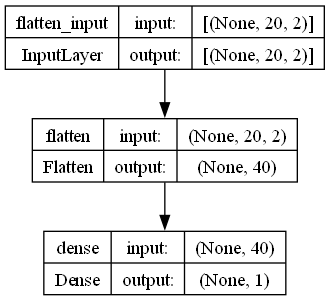

In [10]:
keras.utils.plot_model(model_1, show_shapes=True)

In [11]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 841 (3.29 KB)
Trainable params: 841 (3.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


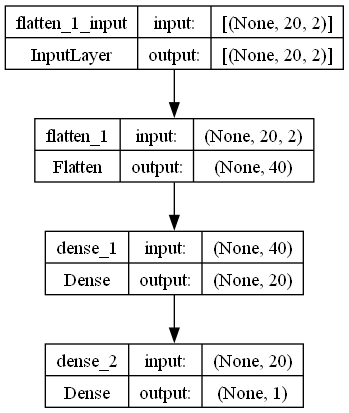

In [12]:
keras.utils.plot_model(model_2, show_shapes=True)

In [13]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 40)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                820       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1041 (4.07 KB)
Trainable params: 1041 (4.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


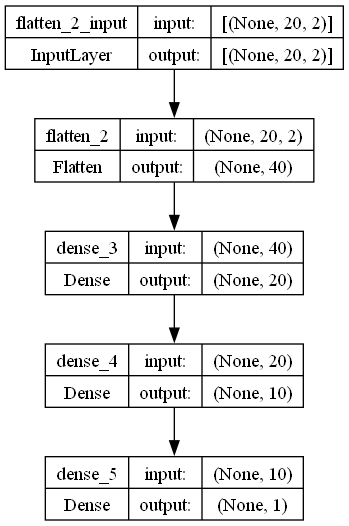

In [14]:
keras.utils.plot_model(model_3, show_shapes=True)

In [15]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                520       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 531 (2.07 KB)
Trainable params: 531 (2.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


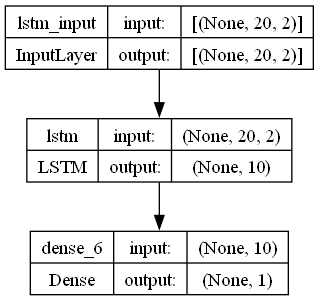

In [16]:
keras.utils.plot_model(model_4, show_shapes=True)

In [17]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 20)                1840      
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2061 (8.05 KB)
Trainable params: 2061 (8.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


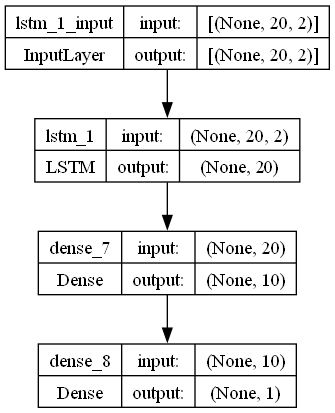

In [18]:
keras.utils.plot_model(model_5, show_shapes=True)

### 6. Compile each model using the MSE as the loss function and the Adam as the optimizer.


In [19]:
model_1.compile(loss="mse", optimizer="adam")
model_2.compile(loss="mse", optimizer="adam")
model_3.compile(loss="mse", optimizer="adam")
model_4.compile(loss="mse", optimizer="adam")
model_5.compile(loss="mse", optimizer="adam")

### 7. Fit each model using the training set with epochs 30 and batch size 32. Set shuffle=False and use the test set as the validation set.

In [20]:
history1 = model_1.fit(X_train_LSTM, Y_train_LSTM, epochs=30, batch_size=32,shuffle=False, validation_data=(X_test_LSTM, Y_test_LSTM))
history2 = model_2.fit(X_train_LSTM, Y_train_LSTM, epochs=30, batch_size=32,shuffle=False, validation_data=(X_test_LSTM, Y_test_LSTM))
history3 = model_3.fit(X_train_LSTM, Y_train_LSTM, epochs=30, batch_size=32,shuffle=False, validation_data=(X_test_LSTM, Y_test_LSTM))
history4 = model_4.fit(X_train_LSTM, Y_train_LSTM, epochs=30, batch_size=32,shuffle=False, validation_data=(X_test_LSTM, Y_test_LSTM))
history5 = model_5.fit(X_train_LSTM, Y_train_LSTM, epochs=30, batch_size=32,shuffle=False, validation_data=(X_test_LSTM, Y_test_LSTM))

Epoch 1/30
30/30 [==============================] - 2s 22ms/step - loss: 8.3589 - val_loss: 5.0524
Epoch 2/30
30/30 [==============================] - 0s 8ms/step - loss: 3.2630 - val_loss: 1.7363
Epoch 3/30
30/30 [==============================] - 0s 7ms/step - loss: 1.0429 - val_loss: 0.5426
Epoch 4/30
30/30 [==============================] - 0s 7ms/step - loss: 0.3398 - val_loss: 0.2392
Epoch 5/30
30/30 [==============================] - 0s 8ms/step - loss: 0.1833 - val_loss: 0.1872
Epoch 6/30
30/30 [==============================] - 0s 7ms/step - loss: 0.1595 - val_loss: 0.1809
Epoch 7/30
30/30 [==============================] - 0s 8ms/step - loss: 0.1562 - val_loss: 0.1793
Epoch 8/30
30/30 [==============================] - 0s 7ms/step - loss: 0.1546 - val_loss: 0.1777
Epoch 9/30
30/30 [==============================] - 0s 8ms/step - loss: 0.1529 - val_loss: 0.1759
Epoch 10/30
30/30 [==============================] - 0s 7ms/step - loss: 0.1511 - val_loss: 0.1740
Epoch 11/30
30/30 

Epoch 24/30
30/30 [==============================] - 0s 8ms/step - loss: 0.0010 - val_loss: 0.0019
Epoch 25/30
30/30 [==============================] - 0s 8ms/step - loss: 9.4816e-04 - val_loss: 0.0018
Epoch 26/30
30/30 [==============================] - 0s 8ms/step - loss: 8.6156e-04 - val_loss: 0.0017
Epoch 27/30
30/30 [==============================] - 0s 8ms/step - loss: 7.8738e-04 - val_loss: 0.0016
Epoch 28/30
30/30 [==============================] - 0s 8ms/step - loss: 7.2005e-04 - val_loss: 0.0015
Epoch 29/30
30/30 [==============================] - 0s 8ms/step - loss: 6.6498e-04 - val_loss: 0.0014
Epoch 30/30
30/30 [==============================] - 0s 8ms/step - loss: 6.1927e-04 - val_loss: 0.0013
Epoch 1/30
30/30 [==============================] - 8s 73ms/step - loss: 0.5329 - val_loss: 0.0909
Epoch 2/30
30/30 [==============================] - 1s 23ms/step - loss: 0.0184 - val_loss: 0.0076
Epoch 3/30
30/30 [==============================] - 1s 23ms/step - loss: 0.0035 - val

### 8. Store final training loss in train_results, final validation loss in test_results, and name of the model in names.  
names = []  
train_results = []  
test_results = []  

In [21]:
print('The value of the last validation loss of Model 1: ', round(history1.history['val_loss'][-1], 7))
print('The value of the last validation loss of Model 2: ', round(history2.history['val_loss'][-1], 7))
print('The value of the last validation loss of Model 3: ', round(history3.history['val_loss'][-1], 7))
print('The value of the last validation loss of Model 1: ', round(history4.history['val_loss'][-1], 7))
print('The value of the last validation loss of Model 2: ', round(history5.history['val_loss'][-1], 7))

The value of the last validation loss of Model 1:  0.1266454
The value of the last validation loss of Model 2:  0.0028153
The value of the last validation loss of Model 3:  0.0013265
The value of the last validation loss of Model 1:  0.0005913
The value of the last validation loss of Model 2:  0.0003009


In [22]:
models = [('Model_1', model_1), ('Model_2', model_2), ('Model_3', model_3), ('Model_4', model_4), ('Model_5', model_5)]

names = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)

    # Full Training period
    model.fit(X_train_LSTM, Y_train_LSTM)
    train_result = mean_squared_error(model.predict(X_train_LSTM), Y_train_LSTM)
    train_results.append(train_result)

    # Test results
    test_result = mean_squared_error(model.predict(X_test_LSTM), Y_test_LSTM)
    test_results.append(test_result)

    msg = "%s: %f %f" % (name, train_result, test_result)
    print(msg)

8/8 [==============================] - 0s 4ms/step
Model_1: 0.101339 0.124063
8/8 [==============================] - 0s 4ms/step
Model_2: 0.000660 0.002736
8/8 [==============================] - 0s 4ms/step
Model_3: 0.000565 0.001334
8/8 [==============================] - 0s 8ms/step
Model_4: 0.000593 0.000562
8/8 [==============================] - 0s 7ms/step
Model_5: 0.000343 0.000317


### 9. Create a bar graph for comparing the performance of the models using the following code.

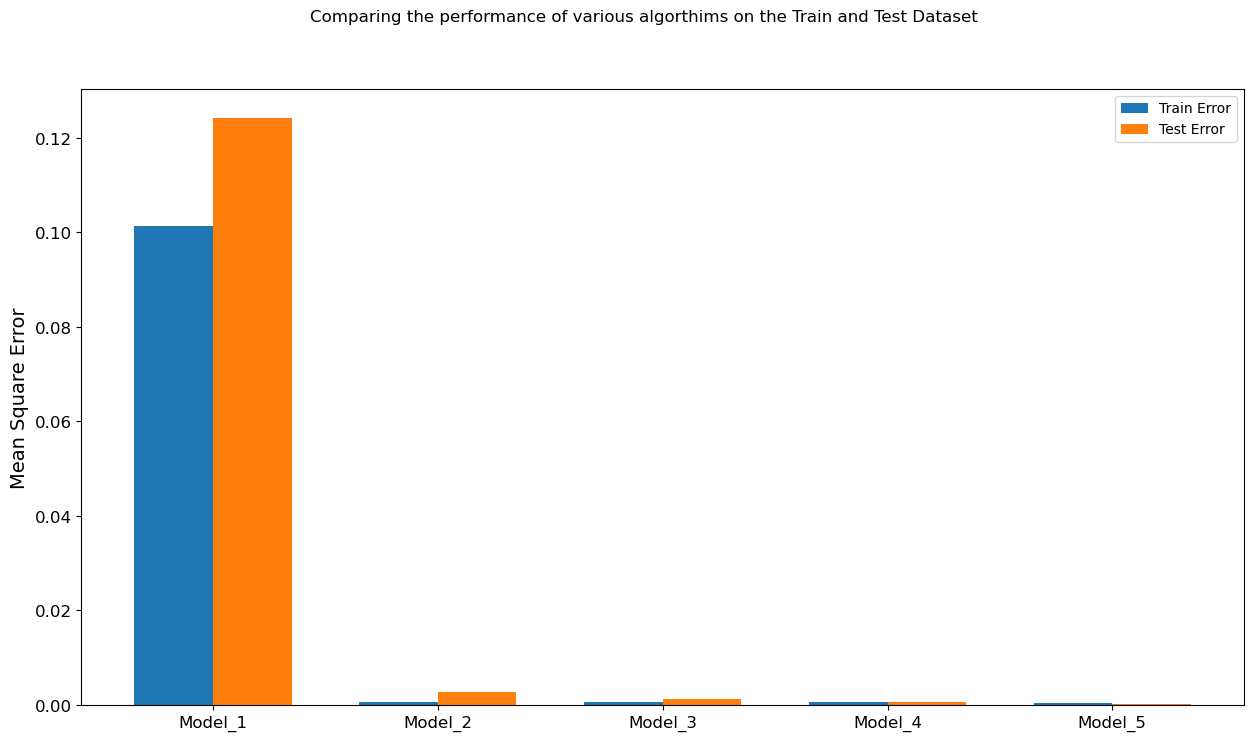

In [23]:
# Compare algorithms
fig = pyplot.figure()
ind = np.arange(len(names)) # the x locations for the groups
width = 0.35 # the width of the bars
fig.suptitle('Comparing the performance of various algorthims on the Train and Test Dataset')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results, width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.ylabel('Mean Square Error')
pyplot.show()